In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from datetime import datetime
import gmaps

In [3]:
# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [4]:
# Specify the path to the CSV file
file = 'C:\\Users\\Nii\\MyTraining\\Resources\\Chicago_Crimes-2001_to_2018.csv'

In [5]:
# Read the CSV in pandas. 
# Ensure the correct encoding is used to read file
df = pd.read_csv(file, encoding="ISO-8859-1")

####  DATA CLEANING:

In [6]:
# Preview the DataFrame
#df.head(2)

In [7]:
# List all column names in DataFrame
#df.columns

In [101]:
# Delete unecessary columns in DataFrame
crimes_df = df.drop(['Case Number', 'IUCR', 'Arrest','Domestic','Beat',
                     'Community Area','FBI Code', 'X Coordinate', 'Y Coordinate', 
                     'Updated On','Location', 'District'], axis = 1)

#crimes_df.head()

In [102]:
#crimes_df.columns

In [103]:
# Identify incomplete rows
#crimes_df.count()

In [104]:
# Drop all rows with missing information
crimes_df = crimes_df.dropna(how='any')

In [105]:
# Verify dropped rows
#crimes_df.count()

In [106]:
# Reorganize Columns
crimes_df = crimes_df[['ID','Date','Year','Primary Type','Description', 'Location Description',
                       'Block','Ward','Latitude','Longitude']]

crimes_df.head(3)

,ID,Date,Year,Primary Type,Description,Location Description,Block,Ward,Latitude,Longitude
0,10000092,03/18/2015 07:44:00 PM,2015,BATTERY,AGGRAVATED: HANDGUN,STREET,047XX W OHIO ST,28.0,41.891399,-87.744385
1,10000094,03/18/2015 11:00:00 PM,2015,OTHER OFFENSE,PAROLE VIOLATION,STREET,066XX S MARSHFIELD AVE,15.0,41.773372,-87.665319
2,10000095,03/18/2015 10:45:00 PM,2015,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,044XX S LAKE PARK AVE,4.0,41.813861,-87.596643


In [107]:
#crimes_df.dtypes

In [108]:
#crimes_df['Primary Type'].value_counts()

In [109]:
# Combine similar offenses together
crimes_df["Primary Type"] = crimes_df["Primary Type"].replace({
     "THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
     "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
     "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
     "OTHER OFFENSES", "DECEPTIVE PRACTICE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "GAMBLING":
     "OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
     "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
     "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
     "NON-CRIMINAL": "OTHER OFFENSES", "PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
     "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
     "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES",
     "HOMICIDE": "ASSAULT" })

crimes_df['Primary Type'].value_counts()

THEFT & ROBBERY    2108807
ASSAULT            1492914
CRIMINAL DAMAGE     869013
OTHER OFFENSES      795859
NARCOTICS           630713
SEX CRIMES           80550
Name: Primary Type, dtype: int64

In [110]:
crimes_df['Location Description'] = crimes_df['Location Description'].replace({"SIDEWALK":"STREET", "ALLEY":"STREET",
            "APARTMENT":"RESIDENCE","RESIDENCE-GARAGE":"RESIDENCE","RESIDENCE PORCH/HALLWAY": 
            "RESIDENCE", "RESIDENTIAL YARD (FRONT/BACK)":"RESIDENCE","CHA APARTMENT": "RESIDENCE",
            "CHA HALLWAY/STAIRWELL/ELEVATOR": "RESIDENCE","SMALL RETAIL STORE":"RETAIL OUTLET","DRUG STORE":
            "RETAIL OUTLET","GAS STATION":"RETAIL OUTLET","DEPARTMENT STORE":"RETAIL OUTLET","RETAIL STORES":
            "RETAIL OUTLET","RESTAURANT":"BUSINESS","BAR OR TAVERN":"BUSINESS","RESTAURANT":"BUSINESS","BANK":
            "BUSINESS","HOTEL/MOTEL":"BUSINESS","VEHICLE NON-COMMERCIAL":"VEHICLE","PARKING LOT":"PUBLIC BUILDING/GROUNDS",
            "SCHOOL, PUBLIC, BUILDING":"SCHOOL","PARK PROPERTY":"PUBLIC BUILDING/GROUNDS","CTA PLATFORM":
            "PUBLIC BUILDING/GROUNDS","CHA PARKING LOT/GROUNDS":"PUBLIC BUILDING/GROUNDS","SCHOOL, PUBLIC, GROUNDS":
            "SCHOOL", "CTA TRAIN":"PUBLIC BUILDING/GROUNDS","VACANT LOT/LAND":"PUBLIC BUILDING/GROUNDS",
            "GROCERY FOOD STORE":"RETAIL OUTLET","PUBLIC HIGH SCHOOL":"SCHOOL",'CTA "L" TRAIN':
            "PUBLIC BUILDING/GROUNDS","PARKING LOT/GARAGE(NON.RESID.)":"PUBLIC BUILDING/GROUNDS","CTA BUS":"VEHICLE",
            "TAVERN/LIQUOR STORE":"RETAIL OUTLET","HOSPITAL BUILDING/GROUNDS":"HOSPITAL",
            "POLICE FACILITY/VEH PARKING LOT":"POLICE BUILDING","CONVENIENCE STORE":
            "RETAIL OUTLET","CHURCH/SYNAGOGUE/PLACE OF WORSHIP":"CHURCH","GOVERNMENT BUILDING/PROPERTY":
            "FEDERAL BUILDING","SCHOOL, PRIVATE, BUILDING":"SCHOOL","GOVERNMENT BUILDING":
            "FEDERAL BUILDING","CONSTRUCTION SITE":"BUSINESS","WAREHOUSE":"BUSINESS","AIRCRAFT":"AIRPORT",
            "ABANDONED BUILDING":"OTHER","CTA GARAGE / OTHER PROPERTY":"PUBLIC BUILDING/GROUNDS","TAXICAB":"VEHICLE",
            "CTA BUS STOP":"PUBLIC BUILDING/GROUNDS","BARBERSHOP":"BUSINESS","CURRENCY EXCHANGE":"BUSINESS","LIBRARY":
            "PUBLIC BUILDING/GROUNDS","ATHLETIC CLUB":"PUBLIC BUILDING/GROUNDS","MEDICAL/DENTAL OFFICE":"BUSINESS",
            "FACTORY/MANUFACTURING BUILDING":"BUSINESS","COMMERCIAL / BUSINESS OFFICE":"BUSINESS","SCHOOL, PRIVATE, GROUNDS":
            "SCHOOL","CLEANING STORE":"RETAIL OUTLET","VEHICLE-COMMERCIAL":"VEHICLE","COLLEGE/UNIVERSITY GROUNDS":"SCHOOL",
            "DRIVEWAY - RESIDENTIAL":"RESIDENCE","SPORTS ARENA/STADIUM":"PUBLIC BUILDING/GROUNDS","CTA STATION":
            "PUBLIC BUILDING/GROUNDS","ATM (AUTOMATIC TELLER MACHINE)":"BUSINESS","DAY CARE CENTER":"SCHOOL","BUSINESS":
            "BUSINESS","CAR WASH":"BUSINESS","AUTO":"VEHICLE","COLLEGE/UNIVERSITY RESIDENCE HALL":"SCHOOL","MOVIE HOUSE/THEATER":
            "RETAIL OUTLET", "APPLIANCE STORE":"RETAIL OUTLET","HIGHWAY/EXPRESSWAY":"STREET","LAKEFRONT/WATERFRONT/RIVERBANK":
            "OTHER","AIRPORT TERMINAL UPPER LEVEL - SECURE AREA":"AIRPORT","AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA":
            "AIRPORT","AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA":"AIRPORT","AIRPORT VENDING ESTABLISHMENT":"AIRPORT",
            "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA":"AIRPORT","AIRPORT BUILDING NON-TERMINAL - SECURE AREA":"AIRPORT",
            "DELIVERY TRUCK":"VEHICLE","ANIMAL HOSPITAL":"HOSPITAL","AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA":"AIRPORT",
            "AIRPORT PARKING LOT":"AIRPORT","OTHER COMMERCIAL TRANSPORTATION":"VEHICLE","VEHICLE - OTHER RIDE SERVICE":"VEHICLE",
            "CREDIT UNION":"BUSINESS","AIRPORT EXTERIOR - NON-SECURE AREA":"AIRPORT","HOUSE":"RESIDENCE","AIRPORT EXTERIOR - SECURE AREA":
            "AIRPORT", "POOL ROOM":"OTHER","COIN OPERATED MACHINE":"OTHER","PAWN SHOP":"OTHER","YARD":"OTHER","BOWLING ALLEY":"OTHER",
            "BOAT/WATERCRAFT":"OTHER","BRIDGE":"STREET","CEMETERY":"PUBLIC BUILDING/GROUNDS","FOREST PRESERVE":
            "OTHER","SAVINGS AND LOAN":"BUSINESS","VACANT LOT":"OTHER","GANGWAY":"AIRPORT","PUBLIC BUILDING/GROUND":"PUBLIC BUILDING/GROUNDS",
            "VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)":"VEHICLE","PORCH":"RESIDENCE","NEWSSTAND":"STREET","RETAIL STORE":"RETAIL OUTLET",
            "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA":"AIRPORT","AIRPORT TRANSPORTATION SYSTEM (ATS)":"AIRPORT","HALLWAY":"OTHER",
            "VEHICLE - DELIVERY TRUCK":"VEHICLE","AUTO / BOAT / RV DEALERSHIP":"BUSINESS","CEMETARY":"PUBLIC BUILDING/GROUNDS","GARAGE":"OTHER",
            "CTA TRACKS - RIGHT OF WAY":"OTHER","CHA PARKING LOT":"PUBLIC BUILDING/GROUNDS","GAS STATION DRIVE/PROP.":"RETAIL OUTLET",
            "CHA GROUNDS":"PUBLIC BUILDING/GROUNDS","TAVERN":"BUSINESS","BASEMENT":"RESIDENCE","CHA HALLWAY":"RESIDENCE","OFFICE":"BUSINESS",
            "DRIVEWAY":"RESIDENCE","VESTIBULE":"OTHER","STAIRWELL":"OTHER","HOTEL":"BUSINESS","CLUB":"BUSINESS","OFFICE":"BUSINESS","BARBER SHOP/BEAUTY SALON":
            "BUSINESS","SCHOOL YARD":"SCHOOL","RAILROAD PROPERTY":"PUBLIC BUILDING/GROUNDS","PUBLIC GRAMMAR SCHOOL":"SCHOOL","TRUCK":"VEHICLE","TAXI CAB":
            "VEHICLE","DUMPSTER":"VEHICLE","MOTEL":"BUSINESS","CHA LOBBY":"PUBLIC BUILDING/GROUNDS","CHA STAIRWELL":"PUBLIC BUILDING/GROUNDS",
            "GARAGE/AUTO REPAIR":"BUSINESS","LIQUOR STORE":"RETAIL OUTLET","NURSING HOME":"HOSPITAL","CTA PROPERTY":"PUBLIC BUILDING/GROUNDS","TRAILER":"OTHER",
            "YMCA":"OTHER","LAKE":"OTHER","VEHICLE-COMMERCIAL - TROLLEY BUS":"VEHICLE","VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS":"VEHICLE","RIVER":"OTHER",
            "KENNEL":"OTHER","FUNERAL PARLOR":"BUSINESS","BANQUET HALL":"OTHER","ROOMING HOUSE":"OTHER","LIVERY STAND OFFICE":"BUSINESS",
            "LAUNDRY ROOM":"OTHER","PRAIRIE":"OTHER","RIVER BANK":"OTHER","COACH HOUSE":"OTHER","SEWER":"OTHER","LAGOON":"OTHER","CLEANERS/LAUNDROMAT":"BUSINESS",
            "HORSE STABLE":"OTHER","FACTORY":"BUSINESS","CHA BREEZEWAY":"OTHER","CHA ELEVATOR":"PUBLIC BUILDING/GROUNDS","FARM":"OTHER","ELEVATOR":"OTHER",
            "POOLROOM":"OTHER","WOODED AREA":"OTHER","LOADING DOCK":"OTHER","TRUCKING TERMINAL":"OTHER","LIVERY AUTO":"BUSINESS","CHURCH PROPERTY":"CHURCH",
            "EXPRESSWAY EMBANKMENT":"STREET","CHA PLAY LOT":"PUBLIC BUILDING/GROUNDS",'CTA "L" PLATFORM':"PUBLIC BUILDING/GROUNDS","JUNK YARD/GARBAGE DUMP":
            "OTHER","COUNTY JAIL":"POLICE/FIRE STATION","JAIL / LOCK-UP FACILITY":"POLICE/FIRE STATION","POLICE BUILDING":"POLICE/FIRE STATION",
            "NURSING HOME/RETIREMENT HOME":"HOSPITAL", "FIRE STATION":"POLICE/FIRE STATION","OTHER RAILROAD PROP / TRAIN DEPOT":"PUBLIC BUILDING/GROUNDS","AIPORT/AIRCRAFT":
            "AIRPORT/AIRCRAFT","AIRPORT": "AIRPORT/AIRCRAFT","HOSPITAL":"PUBLIC BUILDING/GROUNDS","CHURCH":"OTHER","FEDERAL BUILDING":"PUBLIC BUILDING/GROUNDS",
            "POLICE/FIRE STATION":"PUBLIC BUILDING/GROUNDS","AIRPORT/AIRCRAFT":"PUBLIC BUILDING/GROUNDS","PUBLIC BUILDING/GROUNDS":"PUBLIC BLDG"                                        
            })

In [111]:
# Filter the data so that only those listd as 'Narcotics' are in a DataFrame
drugs_crime_df = crimes_df.loc[crimes_df["Primary Type"] == "NARCOTICS", :]

drugs_crime_df.head(2)

,ID,Date,Year,Primary Type,Description,Location Description,Block,Ward,Latitude,Longitude
8,10000101,03/18/2015 10:09:00 PM,2015,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,036XX S WOLCOTT AVE,11.0,41.828138,-87.672782
36,10000139,03/19/2015 01:15:00 AM,2015,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,035XX W CERMAK RD,22.0,41.851682,-87.713304


In [112]:
# Convert the Date column to a datetime type 
drugs_crime_df['Date'] = pd.to_datetime(drugs_crime_df['Date'])

C:\Users\Nii\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
# Separate the time element of the Date column into a new column 
drugs_crime_df['Time'] = drugs_crime_df['Date'].dt.time

C:\Users\Nii\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
# Separate the Month element of the Date column into a new column 
drugs_crime_df['Month'] = drugs_crime_df['Date'].dt.month

# Use list comprehension and apply function to convert month as integer to a string object
drugs_crime_df['Month'] = drugs_crime_df['Month'].apply(lambda x: calendar.month_abbr[x])


C:\Users\Nii\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Nii\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [115]:
# Combine similar offenses together
drugs_crime_df['Description'] = drugs_crime_df["Description"].replace({"POSS: CANNABIS 30GMS OR LESS":"CANNABIS",
                                "POSS CRACK":'COCAINE',"POSS: HEROIN(WHITE)":"HEROIN","POSS: COCAINE":"COCAINE",
                               "MANU/DELIVER: HEROIN (WHITE)":"HEROIN","POSS: CANNABIS MORE THAN 30GMS":"CANNABIS",
                                "MANU/DEL:CANNABIS OVER 10 GMS":"CANNABIS","ATTEMPT POSSESSION CANNABIS":"CANNABIS",
                                "CANNABIS PLANT":"CANNABIS","POSSESSION: SYNTHETIC MARIJUANA":"CANNABIS",
                                "DELIVER CANNABIS TO PERSON <18":"CANNABIS","MANU/POSS. W/INTENT TO DELIVER: SYNTHETIC MARIJUANA":
                                "CANNABIS","MANU/DEL:CANNABIS 10GM OR LESS":"CANNABIS","POSS: CRACK":"COCAINE","POSS: PCP":"OTHERS",
                                "POSS: SYNTHETIC DRUGS":"OTHERS","POSS: HEROIN(BRN/TAN)":"OTHERS","MANU/DELIVER:CRACK":"COCAINE",
                                "POSS: HALLUCINOGENS":"OTHERS","MANU/DELIVER:COCAINE":"COCAINE","CALCULATED CANNABIS CONSPIRACY":
                                "CANNABIS","ALTER/FORGE PRESCRIPTION":"OTHERS","POSS: BARBITUATES":"OTHERS","POS: HYPODERMIC NEEDLE":
                                "HEROIN","POSS: AMPHETAMINES": "OTHERS","SALE/DEL HYPODERMIC NEEDLE": "HEROIN","SOLICIT NARCOTICS ON PUBLICWAY":
                                "CANNABIS","ATTEMPT POSSESSION NARCOTICS": "CANNABIS", "ATTEMPT POSSESSION NARCOTICS": "CANNABIS",
                                "INTOXICATING COMPOUNDS":"OTHERS", "CRIMINAL DRUG CONSPIRACY": "OTHERS", "FOUND SUSPECT NARCOTICS": "CANNABIS",
                                "POSSESSION OF DRUG EQUIPMENT": "OTHERS","FORFEIT PROPERTY": "OTHERS", "POSSESSION OF DRUG EQUIPMENT": "OTHERS",
                                "MANU/DELIVER: HEROIN(BRN/TAN)": "HEROIN", "MANU/DELIVER: HALLUCINOGEN": "OTHERS", "POSS: METHAMPHETAMINES": "OTHERS",
                                "MANU/DELIVER:PCP": "OTHERS", "POSS: HEROIN(BLACK TAR": "HEROIN", "MANU/DELIVER:BARBITUATES": "OTHERS",
                                "MANU/DELIVER:SYNTHETIC DRUGS": "OTHERS","SALE/DEL DRUG PARAPHERNALIA":"OTHERS","CONT SUBS:FAIL TO MAINT RECORD":
                                "OTHERS","FAIL REGISTER LIC:CONT SUBS":"OTHERS","FAILURE TO KEEP HYPO RECORDS":"OTHERS","POSS: HEROIN(BLACK TAR)": 
                                "HEROIN", "POSS: LOOK-ALIKE DRUGS":"OTHERS","MANU/DELIVER:AMPHETAMINES": "OTHERS","MANU/DELIVER: METHAMPHETAMINES":
                                "OTHERS", "DEL CONT SUBS TO PERSON <18":"OTHERS", "MANU/DELIVER:HEROIN(BLACK TAR)":"HEROIN",
                                "MANU/DELIVER:LOOK-ALIKE DRUG":"OTHERS"
                                 })
                                                                              

C:\Users\Nii\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [116]:
drugs_crime_df['Description'].value_counts()

CANNABIS    352641
COCAINE     143615
HEROIN      103818
OTHERS       30639
Name: Description, dtype: int64

In [24]:
# Reorganize Columns
drugs_crime_df = drugs_crime_df[['ID','Date','Year','Month','Time','Primary Type','Description', 'Location Description',
                                 'Block','Ward','Latitude','Longitude']]

drugs_crime_df.head(2)

,ID,Date,Year,Month,Time,Primary Type,Description,Location Description,Block,Ward,Latitude,Longitude
8,10000101,2015-03-18 22:09:00,2015,Mar,22:09:00,NARCOTICS,CANNABIS,STREET,036XX S WOLCOTT AVE,11.0,41.828138,-87.672782
36,10000139,2015-03-19 01:15:00,2015,Mar,01:15:00,NARCOTICS,CANNABIS,STREET,035XX W CERMAK RD,22.0,41.851682,-87.713304


#### CRIMES IN PERCENTAGES:

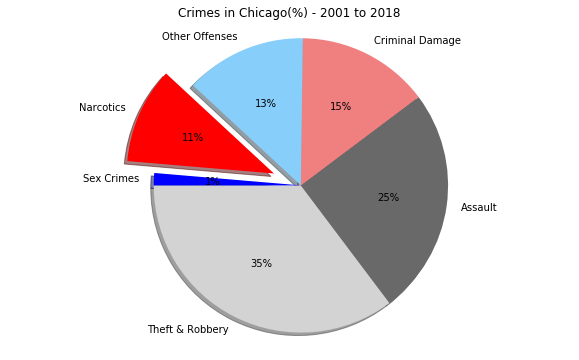

In [25]:
# Labels for the sections of our pie chart
labels = ['Theft & Robbery','Assault','Criminal Damage','Other Offenses','Narcotics',"Sex Crimes"]

# The colors of each section of the pie chart
colors = ["lightgray", "dimgray", "lightcoral", "lightskyblue", "red", "blue"]

# Tells matplotlib to seperate the "Narcotics" section from the others
explode = (0, 0, 0, 0, 0.2, 0)

# Set figure size
plt.figure(figsize=(10,6))

# Creates the pie chart based upon the values above
plt.pie(crimes_df['Primary Type'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle= 180)

# Incorporate other chart properties
plt.axis("equal")
plt.title("Crimes in Chicago(%) - 2001 to 2018")

# Save the output
plt.savefig("Chicago_crimes_Images\\Crimes_in_chicago.png")

plt.show()

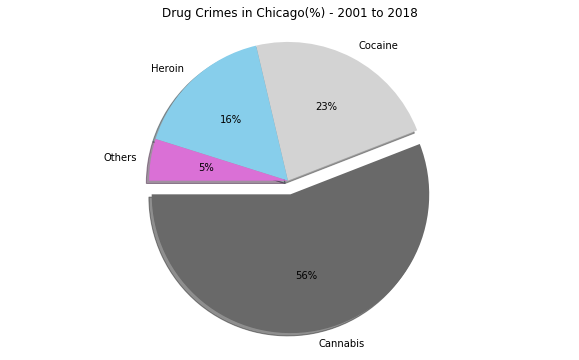

In [26]:
# Labels for the sections of our pie chart
labels = ['Cannabis','Cocaine','Heroin','Others']

# The colors of each section of the pie chart
colors = ["dimgrey", "lightgray", "skyblue", "Orchid"]

# Tells matplotlib to seperate the "Narcotics" section from the others
explode = (0.1, 0, 0, 0, )

# Set figure size
plt.figure(figsize=(10,6))

# Creates the pie chart based upon the values above
plt.pie(drugs_crime_df['Description'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle= 180)

# Incorporate other chart properties
plt.axis("equal")
plt.title("Drug Crimes in Chicago(%) - 2001 to 2018")

# Save the output
plt.savefig("Chicago_crimes_Images\\Drug_crimes_chicago.png")

plt.show()




#### CRIME TRENDS BY YEAR:


In [27]:
# Create dataframes all crimes except narcotics
# Filter the data so that only those listd as 'Theft & Robbery' are in a DataFrame
theft_crimes_df = crimes_df.loc[crimes_df["Primary Type"] == "THEFT & ROBBERY", :]
theft_crimes_year = pd.DataFrame({"No. of Theft Crimes":theft_crimes_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
theft_crimes_year = theft_crimes_year.reset_index()
theft_crimes_year = theft_crimes_year.sort_values('Year', ascending=True)


# Filter the data so that only those listd as 'Assault' are in a DataFrame
assault_crimes_df = crimes_df.loc[crimes_df["Primary Type"] == "ASSAULT", :]
assault_crimes_year = pd.DataFrame({"No. of Assault Crimes":assault_crimes_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
assault_crimes_year = assault_crimes_year.reset_index()
assault_crimes_year = assault_crimes_year.sort_values('Year', ascending=True)



# Filter the data so that only those listd as 'Criminal Damage' are in a DataFrame
damage_crimes_df = crimes_df.loc[crimes_df["Primary Type"] == "CRIMINAL DAMAGE", :]
damage_crimes_year = pd.DataFrame({"No. of Damage Crimes":damage_crimes_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
damage_crimes_year = damage_crimes_year.reset_index()
damage_crimes_year = damage_crimes_year.sort_values('Year', ascending=True)


# Filter the data so that only those listd as 'Other Offenses' are in a DataFrame
other_crimes_df = crimes_df.loc[crimes_df["Primary Type"] == "OTHER OFFENSES", :]
other_crimes_year = pd.DataFrame({"No. of Other Offense Crimes":other_crimes_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
other_crimes_year = other_crimes_year.reset_index()
other_crimes_year = other_crimes_year.sort_values('Year', ascending=True)


# Filter the data so that only those listd as 'Sex Crimes' are in a DataFrame
sex_crimes_df = crimes_df.loc[crimes_df["Primary Type"] == "SEX CRIMES", :]
sex_crimes_year = pd.DataFrame({"No. of Sex Crimes":sex_crimes_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
sex_crimes_year = sex_crimes_year.reset_index()
sex_crimes_year = sex_crimes_year.sort_values('Year', ascending=True)


# Creating a new DataFrame using both Year and Primary Type
drugs_crime_year = pd.DataFrame({"No. of Drug Crimes":drugs_crime_df.groupby(['Year'])['Primary Type'].count()})
# Reset index and sort values by Year
drugs_crime_year = drugs_crime_year.reset_index()
drugs_crime_year = drugs_crime_year.sort_values('Year', ascending=True)
                              
assault_crimes_year.head(3)

,Year,No. of Assault Crimes
0,2001,792
1,2002,92504
2,2003,119245


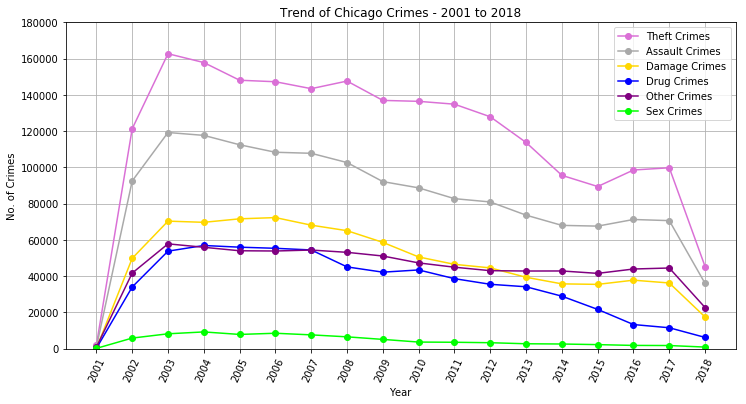

In [28]:
# Use a bar plot to display crime trends over the years
# Set figure size
plt.figure(figsize=(12,6))

# Create plots for each crime
plt.plot(theft_crimes_year['Year'], theft_crimes_year['No. of Theft Crimes'], marker ='o', 
         color='orchid', label="Theft Crimes")

plt.plot(assault_crimes_year['Year'], assault_crimes_year['No. of Assault Crimes'], marker ='o',
         color='darkgrey', label="Assault Crimes")

plt.plot(damage_crimes_year['Year'], damage_crimes_year['No. of Damage Crimes'], marker ='o',
         color='gold', label="Damage Crimes")

plt.plot(drugs_crime_year['Year'], drugs_crime_year['No. of Drug Crimes'], marker ='o', 
         color='blue', label="Drug Crimes")

plt.plot(other_crimes_year['Year'], other_crimes_year['No. of Other Offense Crimes'], marker ='o',
         color='purple', label="Other Crimes")

plt.plot(sex_crimes_year['Year'], sex_crimes_year['No. of Sex Crimes'], marker ='o', 
         color='lime', label="Sex Crimes")


# Incorporate other graph properties
plt.title('Trend of Chicago Crimes - 2001 to 2018')
plt.xlabel("Year")
plt.ylim(0,180000)
plt.ylabel("No. of Crimes")
plt.legend(loc='best')
plt.xticks(np.arange(2001,2019,1), rotation = 65)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\Chicago_trends_crimes.png")

plt.show()
         


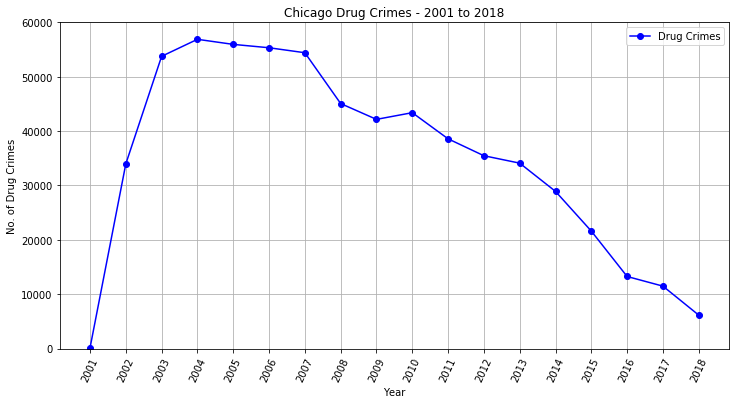

In [29]:
# Set figure size
plt.figure(figsize=(12,6))

# Plot the number of drug crimes per year
plt.plot(drugs_crime_year['Year'], drugs_crime_year['No. of Drug Crimes'], marker ='o', color='blue', label="Drug Crimes")

# Incorporate other graph properties
plt.title('Chicago Drug Crimes - 2001 to 2018')
plt.xlabel("Year")
plt.ylim(0,60000)
plt.ylabel("No. of Drug Crimes")
plt.legend(loc='best')
plt.xticks(np.arange(2001,2019,1), rotation = 65)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\Chicago_drug_crimes.png")

plt.show()
         

#### CRIMES AND LOCATIONS:

In [30]:
#crimes_df['Location Description'].value_counts()
all_crime_locations = pd.DataFrame({"No. of Drug Crimes":crimes_df['Location Description'].value_counts()})

all_crime_locations.head(3)

,No. of Drug Crimes
STREET,2299708
RESIDENCE,1990768
PUBLIC BLDG,462197


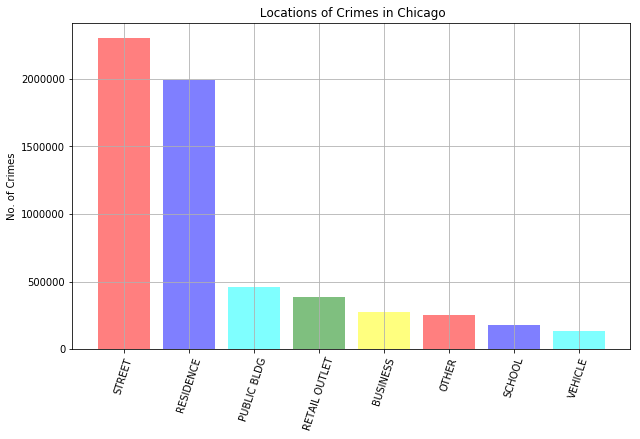

In [31]:
# Assign Variables for plotting  
y_axis = all_crime_locations['No. of Drug Crimes']
x_axis = all_crime_locations.index
color = ['red','blue','cyan','green', 'yellow',]

# Set figure size
plt.figure(figsize=(10,6))

# Create a Bar plot  
plt.bar(x_axis, y_axis , color=color, alpha=0.5, align="center")

# Incorporate other chart properties
plt.title(" Locations of Crimes in Chicago")
plt.ylabel("No. of Crimes")
plt.xticks(rotation=72)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\Crimes_locations_chicago.png")

plt.show()

In [32]:
# Create a dataframe by grouping Location Description and counting Primary Type
drugs_crime_locations = pd.DataFrame({"Crime_count": drugs_crime_df.groupby(['Location Description'])['Primary Type'].count() })

# Reset index and sort values by crime count
drugs_crime_locations = drugs_crime_locations.reset_index()
drugs_crime_locations = drugs_crime_locations.sort_values('Crime_count', ascending=False)

drugs_crime_locations.head(2)

,Location Description,Crime_count
6,STREET,464676
3,RESIDENCE,55596


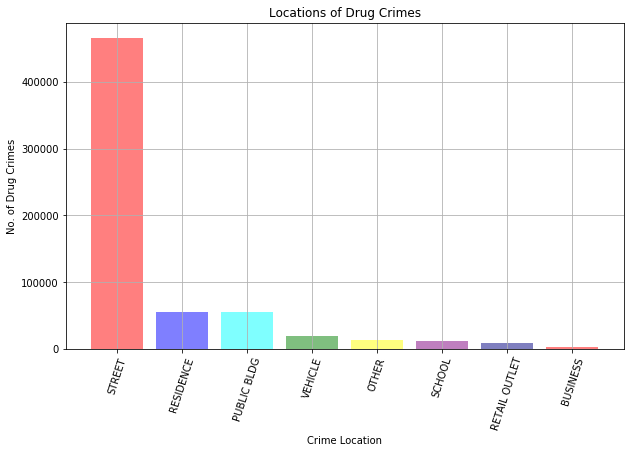

In [33]:
# Assign Variables for plotting  
x_axis = drugs_crime_locations['Location Description']
y_axis = drugs_crime_locations['Crime_count']
color = ['red','blue','cyan','green', 'yellow', 'purple', 'navy']

# Set figure size
plt.figure(figsize=(10,6))

# Create a Bar plot  
plt.bar(x_axis, y_axis , color=color, alpha=0.5, align="center")

# Incorporate other chart properties
plt.title("Locations of Drug Crimes")
plt.ylabel("No. of Drug Crimes")
plt.xlabel("Crime Location")
plt.xticks(rotation=72)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\DrugCrimes_locations_chicago.png")

plt.show()


#### DRUG CRIMES BY MONTH AND TIME :


In [34]:
# Creating a new DataFrame using Month and Primary Type columns
drugs_crime_month = pd.DataFrame({"No. of Drug Crimes":drugs_crime_df.groupby(['Month'])['Primary Type'].count() })

# Reset index and sort values by number of drug crimes
drugs_crime_month = drugs_crime_month.reset_index()
drugs_crime_month = drugs_crime_month.sort_values('No. of Drug Crimes', ascending=False)

drugs_crime_month.head(3)

,Month,No. of Drug Crimes
8,May,55598
7,Mar,55545
1,Aug,55265


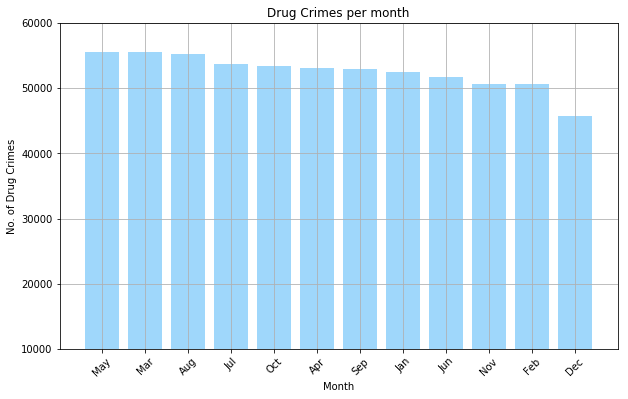

In [35]:
# Set figure size
plt.figure(figsize=(10,6))

# Create a Bar plot  
plt.bar(drugs_crime_month['Month'], drugs_crime_month['No. of Drug Crimes'] , color='lightskyblue', alpha=0.8, align="center")

# Incorporate other chart properties
plt.title("Drug Crimes per month")
plt.ylabel("No. of Drug Crimes")
plt.ylim(10000,60000)
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\DrugCrimes_months_chicago.png")

plt.show()

In [36]:
# Create a Dataframe for number of drug crimes and time of crimes
times = drugs_crime_df['Time'].value_counts()
drugs_crime_times = pd.DataFrame({"No. of Crimes":drugs_crime_df['Time'].value_counts(), "Time":times.index})

# Change the Time column to a datetime type and format as Hour
drugs_crime_times["Time"] = pd.to_datetime(drugs_crime_times["Time"], format='%X').dt.hour

# Reset Dataframe index
drugs_crime_times = drugs_crime_times.reset_index()
  
# Group dataframe by Time and count of Time
drugs_crime_timess = drugs_crime_times.groupby('Time')['No. of Crimes'].sum()
drugs_crime_timess = pd.DataFrame({"No. of Crimes":drugs_crime_timess})

drugs_crime_timess.head(3)

,No. of Crimes
Time,
0,21971
1,13035
2,8169


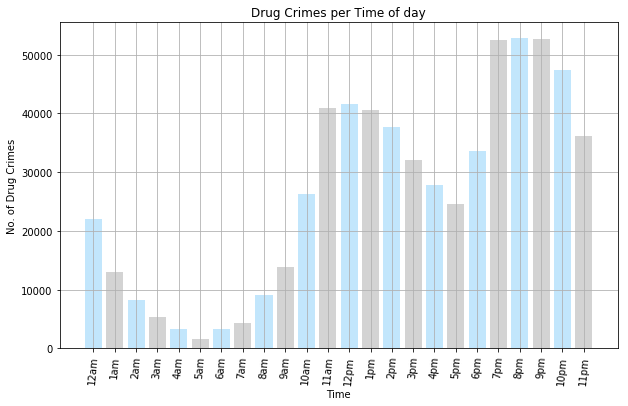

In [37]:
# Assign Variables for Bar plot  
x_axis = ['12am','1am','2am','3am','4am','5am','6am','7am','8am','9am','10am','11am','12pm',
          '1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm','9pm','10pm','11pm']

y_axis = drugs_crime_timess['No. of Crimes']

color = ['lightskyblue','darkgray']

# Set figure size
plt.figure(figsize=(10,6))

# Create a Bar plot  
plt.bar(x_axis, y_axis , color=color, alpha=0.5, align="center")

# Incorporate other chart properties
plt.title("Drug Crimes per Time of day")
plt.ylabel("No. of Drug Crimes")
plt.xlabel("Time")
plt.xticks(rotation=85)
plt.grid(True)

# Save the output
plt.savefig("Chicago_crimes_Images\\DrugCrimes_times_chicago.png")

plt.show()

#### DRUG CRIMES AND WARDS:

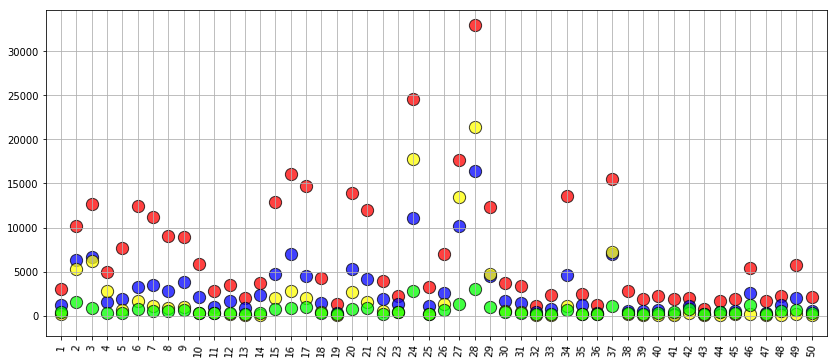

In [205]:
# Filter the data so that only those listd are in a DataFrame

drug_cann_wards = drugs_crime_df.loc[drugs_crime_df['Description'] == "CANNABIS", :]

drug_coca_wards = drugs_crime_df.loc[drugs_crime_df['Description'] == "COCAINE", :]

drug_hero_wards = drugs_crime_df.loc[drugs_crime_df['Description'] == "HEROIN", :]

drug_other_wards = drugs_crime_df.loc[drugs_crime_df['Description'] == "OTHERS", :]


x_cann_axis = drug_cann_wards.groupby('Ward')['Description'].count()
x_coca_axis = drug_coca_wards.groupby('Ward')['Description'].count()
x_hero_axis = drug_hero_wards.groupby('Ward')['Description'].count()
x_others_axis = drug_other_wards.groupby('Ward')['Description'].count()



drug_crimes_wards = pd.DataFrame({'X-axis':x_cann_axis.index , "Cannabis":x_cann_axis,'X1-axis':x_coca_axis.index,
                                  "Cocaine":x_coca_axis, "X2-axis": x_hero_axis.index,"Heroin": x_hero_axis, 
                                  'X3-axis': x_others_axis.index, "Others": x_others_axis})





# Set figure size
plt.figure(figsize=(14,6))

plt.grid(True)

# The size of each point on our plot is determined by their x value
plt.scatter([np.arange(1,51,1)] , drug_crimes_wards['Cannabis'], marker="o", facecolors="red", s= 150,
            edgecolors="black",alpha=0.75)


plt.scatter( [np.arange(1,51,1)] , drug_crimes_wards['Cocaine'], marker="o", facecolors="blue", s= 150,
             edgecolors="black",alpha=0.75)


plt.scatter( [np.arange(1,51,1)] , drug_crimes_wards['Heroin'], marker="o", facecolors="yellow", s= 150,
             edgecolors="black",alpha=0.75)



plt.scatter( [np.arange(1,51,1)] , drug_crimes_wards['Others'], marker="o", facecolors="lime", s= 150,
             edgecolors="black",alpha=0.75)


#rug_crimes_wards.info()
#x_axis.head(50)
#drug_crimes_wards.head()
#x_axis.()
#x_axis
#drugs_crime_df.head()

plt.xticks(np.arange(1,51,1), rotation=85)
plt.xlim(0,51)
#plt.ylim(-1000, 35000)


plt.show()

#### HEATMAP OF DRUG CRIME LOCATIONS

In [ ]:
# Set up a variable for longitude and latitude coordinates                                                 
coordinates = drugs_crime_df[['Latitude', 'Longitude']]

# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

# Assign layout to a variable
fig = gmaps.figure()

# Assign the marker layer to a variable
markers = gmaps.heatmap_layer(coordinates)

# Add the layer to the map
fig.add_layer(markers)

fig